In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import thinkplot
import thinkstats2

%matplotlib inline
sns.set()

In [32]:
# read in data from a csv file
df = pd.read_csv('../Data/austin_bikeshare_trips.csv')

# Remove any trip with 0 minute duration
df = df[df['duration_minutes'] > 0]

# Reset the integer based index of the DataFrame
df.reset_index(drop=True, inplace=True)

greater_than_2_hours = df[df['duration_minutes'] > 120]
frac_of_dataset = 100 * len(greater_than_2_hours) / len(df)

# Remove any trip lasting longer than 2 hours
df = df[df['duration_minutes'] <= 120]

# Reset the integer based index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [3]:
df.head(1)

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0


## Duration by month of year

In [4]:
# Group the rows by the start_day_of_week and compute summary statistics
df.groupby('month')['duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1.0,41825.0,20.976665,21.055467,1.0,7.0,14.0,25.0,120.0
2.0,40019.0,22.633874,21.583905,1.0,8.0,15.0,29.0,120.0
3.0,106775.0,20.191918,19.492481,1.0,8.0,14.0,24.0,120.0
4.0,50560.0,23.728896,22.360895,1.0,9.0,16.0,30.0,120.0
5.0,66033.0,23.073342,21.763281,1.0,9.0,16.0,29.0,120.0
6.0,41906.0,21.389825,21.163554,1.0,8.0,14.0,26.0,120.0
7.0,44670.0,21.613230,21.437079,1.0,8.0,14.0,26.0,120.0
8.0,36104.0,19.962414,20.517932,1.0,7.0,13.0,24.0,120.0
9.0,40405.0,19.871823,20.090361,1.0,7.0,13.0,24.0,120.0


In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July',
         'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

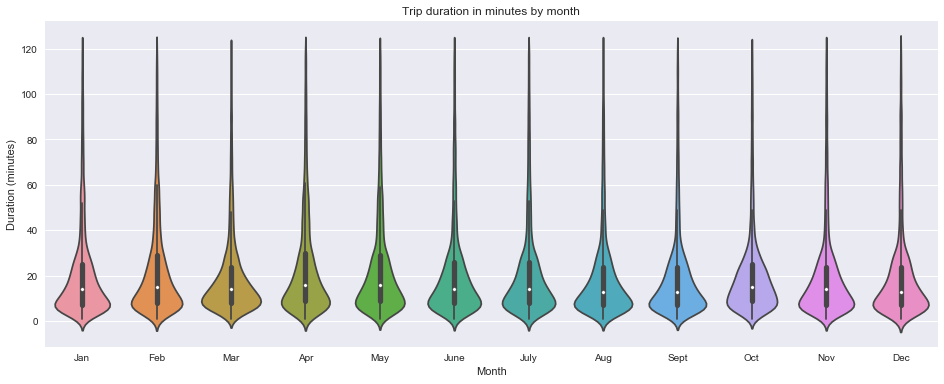

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="month", y="duration_minutes", data=df, ax=ax)

ax.set_title('Trip duration in minutes by month')
ax.set_xlabel('Month')
ax.set_ylabel('Duration (minutes)')
ax.set_xticklabels(months)

plt.show()

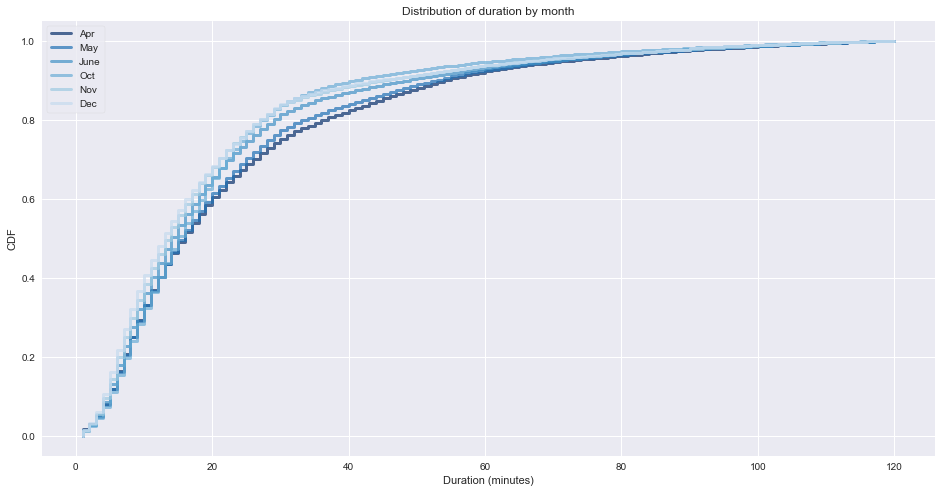

In [23]:
cdfs = [] 

#for i in range(8):
for i in [3,4, 5, 9, 10, 11]:
    month_rides = df[df['month'] == i+1]
    cdf = thinkstats2.Cdf(month_rides['duration_minutes'],
                          label=months[i])
    cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(title='Distribution of duration by month', 
                 xlabel='Duration (minutes)', ylabel='CDF')

This plot above begins to show that temperature has an effect on the duration of bike rides. The CDFs of warmer summer months appear further to the right. Let's make it again just looking at rides under 90 minutes

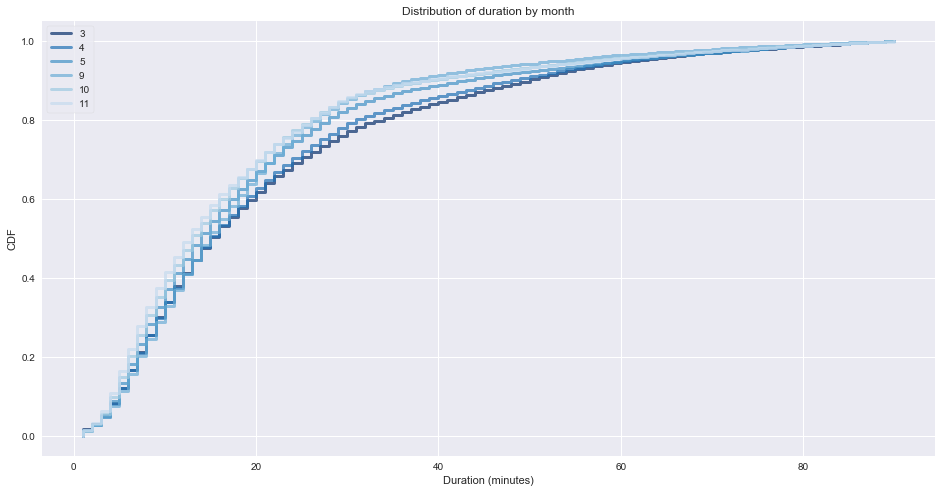

In [18]:
sub_90 = df[df['duration_minutes'] <= 90]

cdfs = [] 

#for i in range(8):
for i in [3,4, 5, 9, 10, 11]:
    month_rides = sub_90[sub_90['month'] == i+1]
    cdf = thinkstats2.Cdf(month_rides['duration_minutes'], label=str(i))
    cdfs.append(cdf)
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(title='Distribution of duration by month', 
                 xlabel='Duration (minutes)', ylabel='CDF')

### Scatter temperature against duration

In [41]:
# read in data from a csv file
weather_df = pd.read_csv('../Data/austin_weather.csv')

# Replace values with NaNs
weather_df.replace('-', np.nan, inplace=True)
weather_df.replace('T', np.nan, inplace=True)

# Convert column types to float
for col in weather_df:
    if col != 'Date' and col != 'Events':
        weather_df[[col]] = weather_df[[col]].astype(float)
        
# Convert the column type to the datetime type
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
# Set the index to that column
weather_df.index = weather_df['Date']
del weather_df['Date']

In [33]:
# convert start_time column to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])

In [45]:
# Computer the average duration of rides per day
_df = df[['start_time', 'duration_minutes']]
_df.index = _df['start_time']

del _df['start_time']

_df = _df.resample('D').mean()

_df = _df.join(weather_df)

In [46]:
_df.columns

Index(['duration_minutes', 'TempHighF', 'TempAvgF', 'TempLowF',
       'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

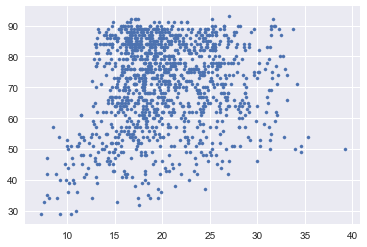

In [70]:
plt.scatter(_df['duration_minutes'], _df['TempAvgF'], s=10)
plt.show()

In [68]:
plt.scatter?

In [49]:
against = ['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
           'VisibilityAvgMiles', 'VisibilityLowMiles', 
           'PrecipitationSumInches', 'WindHighMPH', 'WindAvgMPH',
           'WindGustMPH']

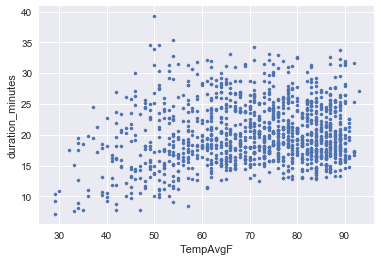

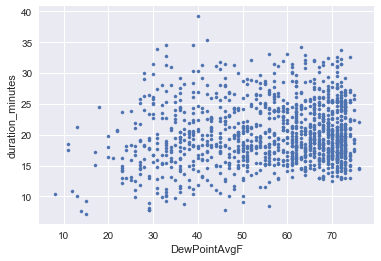

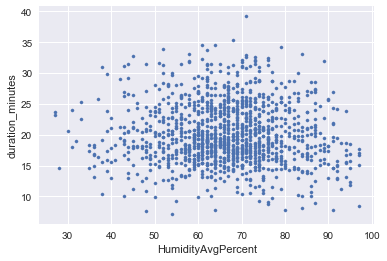

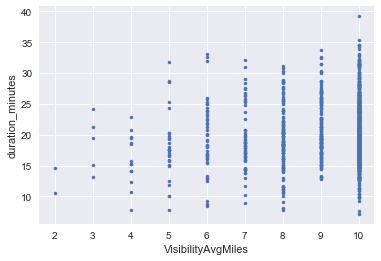

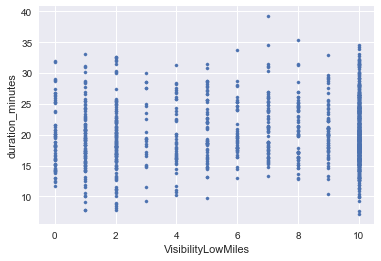

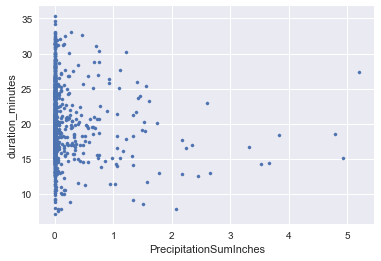

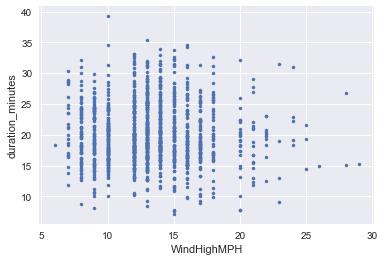

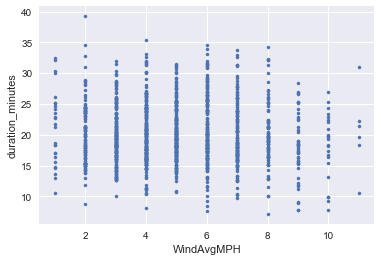

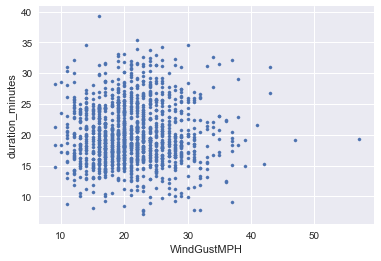

In [73]:
for i, col in enumerate(against):
    plt.scatter(_df[col], _df['duration_minutes'], s=10)
    plt.ylabel('duration_minutes')
    plt.xlabel(col)
    plt.show()

### Focus on temperature 

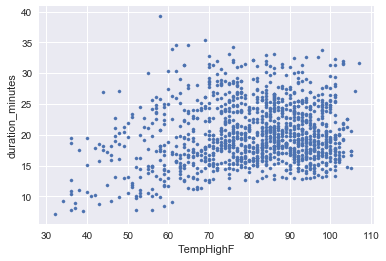

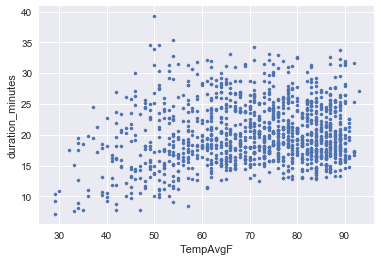

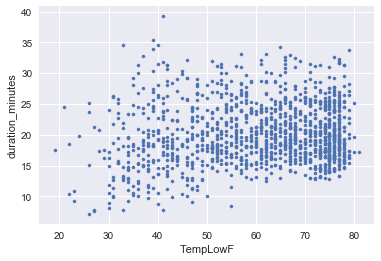

In [74]:
for col in ['TempHighF', 'TempAvgF', 'TempLowF']:
    plt.scatter(_df[col], _df['duration_minutes'], s=10)
    plt.ylabel('duration_minutes')
    plt.xlabel(col)
    plt.show()

### Precip

In [81]:
no_rain_df = _df[_df['PrecipitationSumInches'] == 0]
no_rain_df['duration_minutes'].describe()

count    835.000000
mean      20.376201
std        4.699082
min        7.170732
25%       17.124393
50%       19.611111
75%       23.807264
max       35.310484
Name: duration_minutes, dtype: float64

In [82]:
rain_df = _df[_df['PrecipitationSumInches'] != 0]
rain_df['duration_minutes'].describe()

count    422.000000
mean      19.810918
std        5.371430
min        7.562500
25%       16.306425
50%       19.168249
75%       23.253920
max       39.224806
Name: duration_minutes, dtype: float64

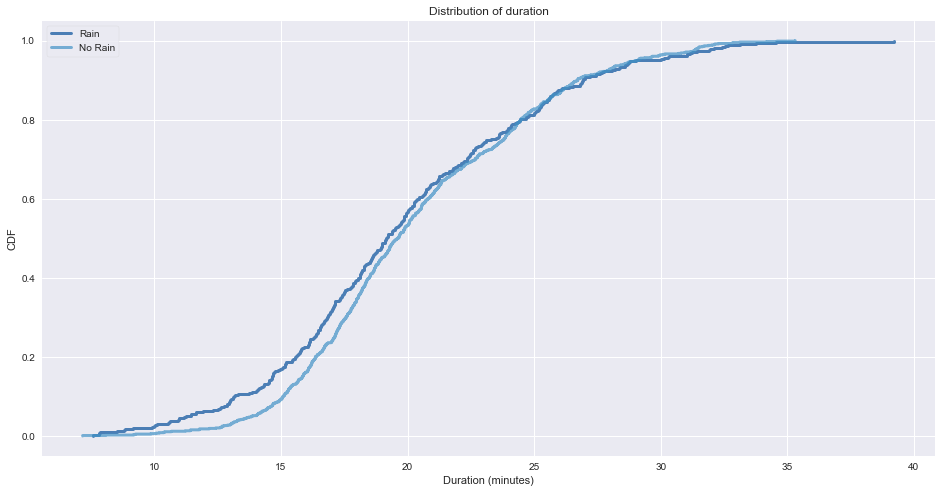

In [84]:
cdfs = [thinkstats2.Cdf(rain_df['duration_minutes'], label='Rain'),
       thinkstats2.Cdf(no_rain_df['duration_minutes'], label='No Rain')] 
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(title='Distribution of duration', 
                 xlabel='Duration (minutes)', ylabel='CDF')

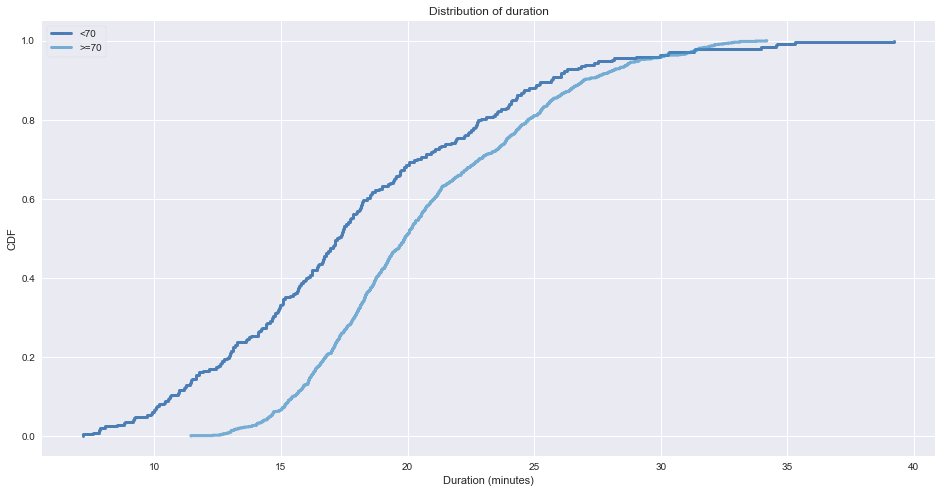

In [85]:
sub_70_df = _df[_df['TempHighF'] < 70]
greater_70_df = _df[_df['TempHighF'] >= 70]

cdfs = [thinkstats2.Cdf(sub_70_df['duration_minutes'], label='<70'),
       thinkstats2.Cdf(greater_70_df['duration_minutes'], label='>=70')] 
    
plt.figure(figsize=(16,8))
thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(title='Distribution of duration', 
                 xlabel='Duration (minutes)', ylabel='CDF')

### Visibility scatter

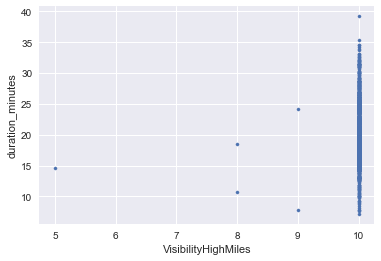

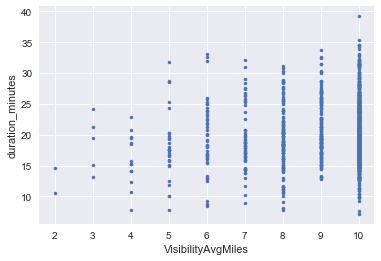

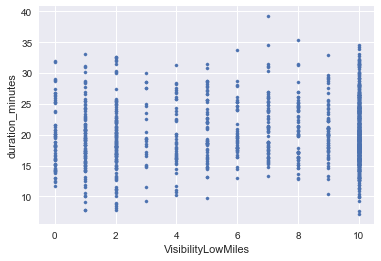

In [86]:
for col in ['VisibilityHighMiles','VisibilityAvgMiles',
            'VisibilityLowMiles']:
    plt.scatter(_df[col], _df['duration_minutes'], s=10)
    plt.ylabel('duration_minutes')
    plt.xlabel(col)
    plt.show()

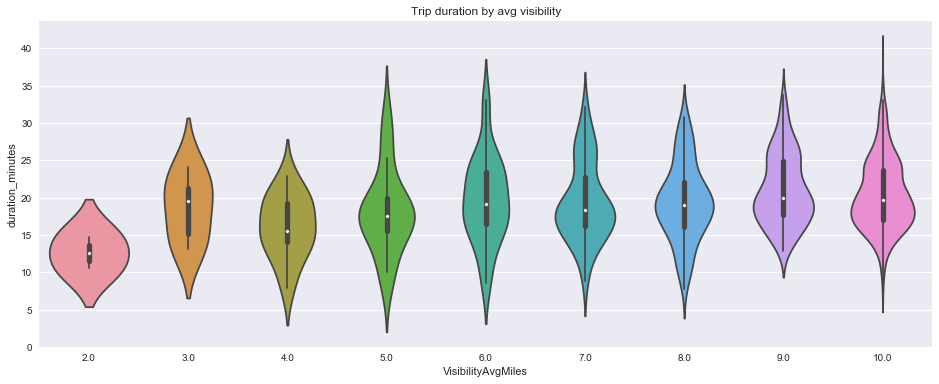

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

sns.violinplot(x="VisibilityAvgMiles", y="duration_minutes", data=_df, ax=ax)

ax.set_title('Trip duration by avg visibility')

plt.show()

### Number of rides per day vs temp?

In [108]:
_df = df[['start_time']].copy()
_df.index = _df['start_time']
del _df['start_time']
_df['num_trips'] = 0
_df = _df.resample('D').count()
_df = _df.join(weather_df)

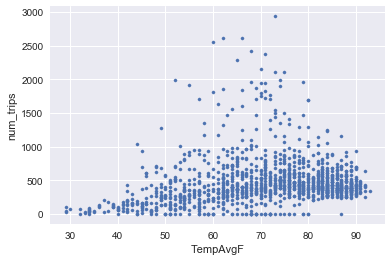

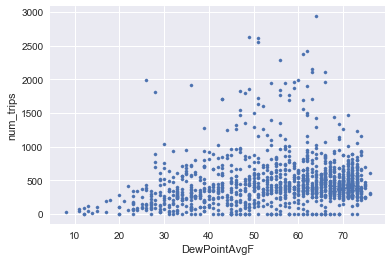

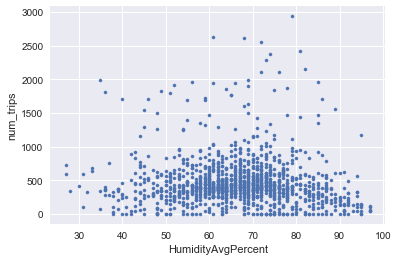

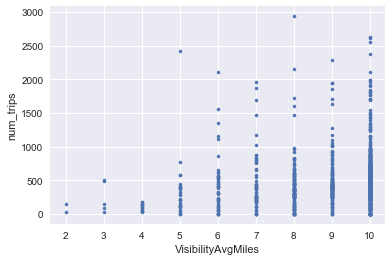

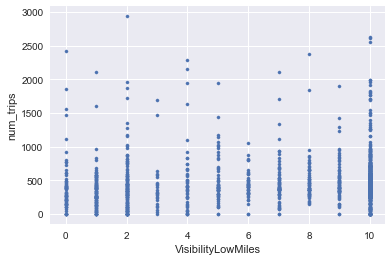

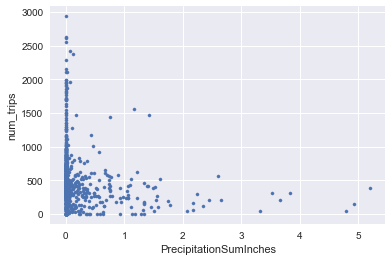

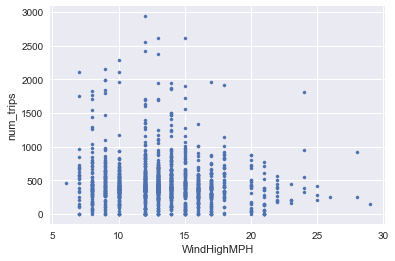

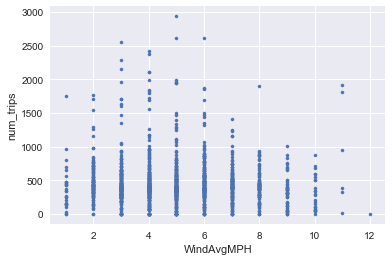

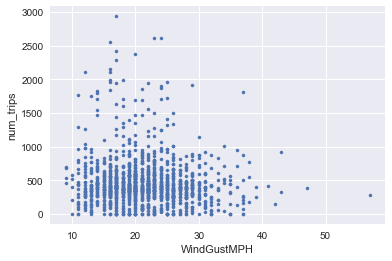

In [109]:
for i, col in enumerate(against):
    plt.scatter(_df[col], _df['num_trips'], s=10)
    plt.ylabel('num_trips')
    plt.xlabel(col)
    plt.show()